# Importing librairies and loading dataset

In [1]:
import numpy as np # Import the pandas library as pd for data manipulation

import pandas as pd # Import the numpy library as np for numerical operations

import matplotlib.pyplot as plt # Import the matplotlib.pyplot module as plt for plotting graphs and visualizations

import seaborn as sns # Import the seaborn library as sns for statistical data visualization

df=pd.read_csv("C:/Users/anasd/Desktop/cafe_sales.csv")

# Data Exploration Phase 

In [2]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,9/8/2023
1,TXN_4977031,Cake,4,3,12,Cash,In-store,5/16/2023
2,TXN_4271903,Cookie,4,1,ERROR,Credit Card,In-store,7/19/2023
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,4/27/2023
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,6/11/2023
5,TXN_2602893,Smoothie,5,4,20,Credit Card,NaN,3/31/2023
6,TXN_4433211,UNKNOWN,3,3,9,ERROR,Takeaway,10/6/2023
7,TXN_6699534,Sandwich,4,4,16,Cash,UNKNOWN,10/28/2023
8,TXN_4717867,NaN,5,3,15,NaN,Takeaway,7/28/2023
9,TXN_2064365,Sandwich,5,4,20,NaN,In-store,12/31/2023


In [3]:
print("Number of rows :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows : 10000
Number of columns : 8


In [4]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3,6,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

# Data Wrangling
<details>
  <summary>
      <h3>According to Data Exploration there are some notes :</h3></summary>
  1. Sum columns need to be converted to its proper type ex(Quantity,Price Per Unit,Transaction Date,etc)
  2. Null values in (Quantity , Price Per Unit , Total) Spent Can be handeld using logical operations
  3. Since Null values in each of location , payment method are a lot so will fill it with unknown
  4. Transaction Date null values is a small loss so , dropping is the right decision
</details>

In [8]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df["Transaction Date"]=pd.to_datetime(df["Transaction Date"],errors="coerce")

In [9]:
def fill_missing(df):
    missing_filter=df["Quantity"].isna() &df["Price Per Unit"].notna()& df["Total Spent"].notna()
    df.loc[missing_filter,"Quantity"]=df.loc[missing_filter,"Total Spent"]/df.loc[missing_filter,"Price Per Unit"]
    # Quantity = Total spent / Price per unit
    
    missing_filter=df["Quantity"].notna() &df["Price Per Unit"].notna()& df["Total Spent"].isna()
    df.loc[missing_filter,"Total Spent"]=df.loc[missing_filter,"Quantity"]*df.loc[missing_filter,"Price Per Unit"]
    # Total spent = Quantity * Price per unit
    
    missing_filter=df["Quantity"].notna() &df["Price Per Unit"].isna()& df["Total Spent"].notna()
    df.loc[missing_filter,"Price Per Unit"]=df.loc[missing_filter,"Total Spent"]/df.loc[missing_filter,"Quantity"]
    
    # Price per unit = Total spent / Quantity
    return df
df=fill_missing(df) 

In [10]:
df = df.dropna(subset=["Item","Quantity","Price Per Unit","Total Spent"]) 
# dropping two and three missing values ,only one missing value cases can be filled
# dropping null items is essential to avoid misleading analysis and visualization

df.dropna(subset=['Transaction Date'], inplace=True)

df['Payment Method'] = df['Payment Method'].fillna('UNKNOWN')
df['Payment Method'] = df['Payment Method'].replace(['Unknown','ERROR'],'UNKNOWN')
df['Location'] = df['Location'].fillna('UNKNOWN')
df['Location'] = df['Location'].replace(['Unknown','ERROR'],'UNKNOWN')
to_replace=['UNKNOWN','ERROR']
df['Item'] = df['Item'].replace(to_replace, np.nan)

In [11]:
df.isna().sum() # rechecking

Transaction ID        0
Item                608
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

# Data Visualization and Insights Extraction

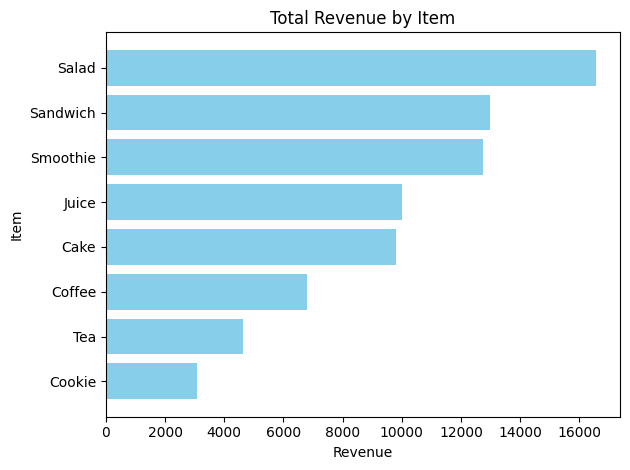

In [12]:
item_sales = df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False)
plt.barh(y=item_sales.index, width=item_sales.values,color="skyblue")

plt.title("Total Revenue by Item")
plt.xlabel("Revenue")
plt.ylabel("Item") 

plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()


**Insight:**
> The bar chart clearly shows that **Salad** and **Sandwich** are the top two revenue drivers for the cafe. While items like Coffee and Juice are popular, their lower price points result in a smaller, though still significant, contribution to overall revenue. **Cookie** is the lowest-performing item in terms of sales.

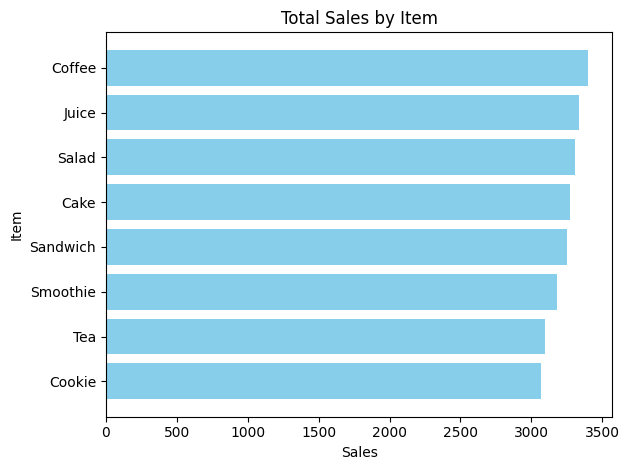

In [13]:
item_sales = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False)
plt.barh(y=item_sales.index, width=item_sales.values,color="skyblue")

plt.title("Total Sales by Item")
plt.xlabel("Sales")
plt.ylabel("Item") 

plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()


**Insight:**
> The bar chart clearly shows that **Coffee** and **Juice** are the top two best-seller Products for the cafe. 

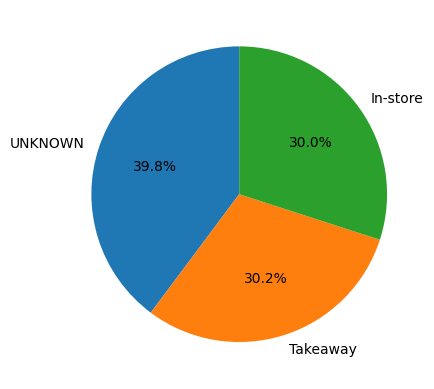

In [14]:
item_num=df["Location"].value_counts()
plt.pie(item_num, labels=item_num.index, startangle=90, autopct="%.1f%%")
plt.show()

**Insight:**
> The pie chart shows that Customers slightly prefer to order as Takeaway however, this insight is not accurate due to big percent of location missing data

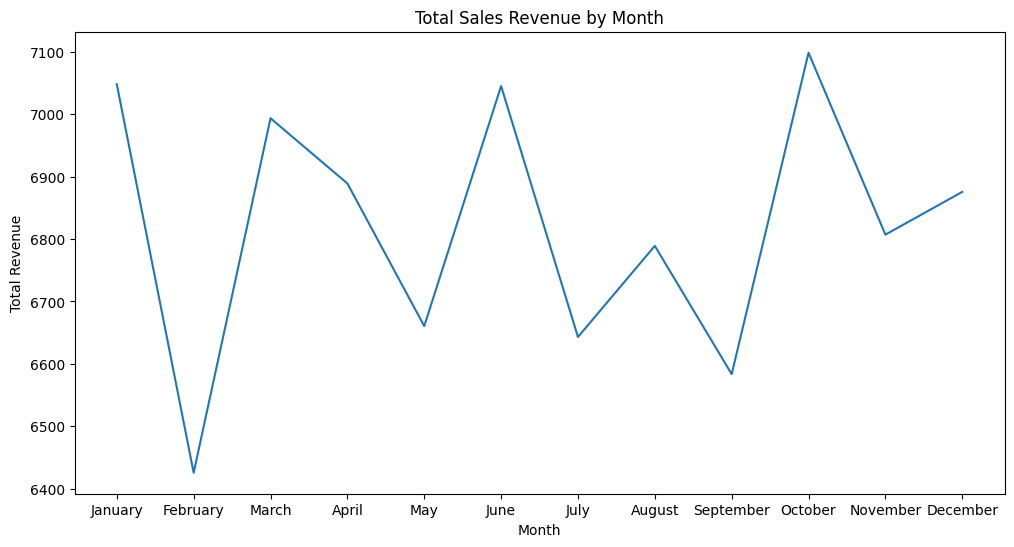

In [25]:
# Create new columns for month and day of the week for easier grouping
df['Month'] = df['Transaction Date'].dt.month_name()
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()
# --- Plot Total Sales per Month ---
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_sales = df.groupby('Month')['Total Spent'].sum().reindex(month_order)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales Revenue by Month')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.show()

**Insight:**
> The revenue is not stable , Janauaty and October are the highest peaks , a dramatic fall in febreuary 